**<span style="color:red">Namn och CID på gruppmedlemmar: </span>**

Philip Kappel Cursaz, cursaz

Joel Sjösten Johannesson, joelsjos

Alfred Gustavsson Svedenbjörk, alfgus

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Uppgift 1 - 3D-bio

#### **(a)** Skriv en kort funktion $J_{proj}(𝛼)$, som ger Jones-matrisen som projicerar $E$-fältets komponenter på ett koordinatsystem vridet vinkeln $𝛼$


In [28]:
# Byt ut np.nan värdena så att det blir rätt!
def J_proj(alpha):
    return np.array([[np.cos(alpha), np.sin(alpha)],
                     [-np.sin(alpha), np.cos(alpha)]])


#### **(b)** Skriv de två korta funktionerna $J_{pol}(𝛼)$, som genererar Jones-matrisen för en roterad polarisator med transmissionsriktningen vinkeln $𝛼$ från $x$-axeln, samt $J_{ret}(𝛼,𝜑)$ som ger Jones-matrisen för en roterad ”retarder” med fasförskjutningen $𝜑$ radianer (en kvartsvågsplatta har alltså $𝜑=𝜋/2$) och eo-riktningen vinkeln $𝛼$ från $x$-axeln. Utnyttja funktionen $J_{proj}(𝛼)$.


In [29]:
def J_pol(alpha):
    return J_proj(-alpha) @ np.array([[1,0],[0,0]]) @ J_proj(alpha)

def J_ret(alpha, phi):
    return J_proj(-alpha) @ np.array([[np.exp(1j * phi),0],[0,1]]) @ J_proj(alpha) 


#### **(c)** Relatera $E^{ut}$ till $E^{in}$ för de fyra olika fallen. Beräkna även $I^{ut}$ och visa att inget ljus kommer fram i fall (ii) och (iii), medan hela $E^{in}$:s amplitud finns kvar vid observatörens öga i fall (i) och (iv).

In [43]:
# (i) R→R

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(-np.pi/4,np.pi/2) @ J_ret(np.pi/4,np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

1.0


In [31]:
# (ii) R→L

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(np.pi/4,np.pi/2) @ J_ret(np.pi/4,np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

5.238529448733282e-32


In [32]:
# (iii) L→R

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(-np.pi/4,np.pi/2) @ J_ret(-np.pi/4,np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

5.238529448733282e-32


In [33]:
# (iv) L→L

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(np.pi/4,np.pi/2) @ J_ret(-np.pi/4,np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

1.0


#### **(d)** Tyvärr är inte kvartsvåglängdsplattan våglängdsoberoende i verkligheten, utan fungerar bara perfekt för en våglängd i mitten av det synliga spektrumet. Antag att för en våglängd i kanten av det synliga området så avviker fasförskjutningen med $25$% (välj själv åt vilket håll) från den perfekta $𝜋/2$, för alla kvartsvågsplattorna. Hur mycket av den oönskade bilden – den som tidigare var svart – ser man nu?


In [34]:
# (i) R→R

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ J_ret(np.pi/4, 0.75 * np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

0.9999999999999998


In [35]:
# (ii) R→L

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(np.pi/4, 0.75 * np.pi/2) @ J_ret(np.pi/4, 0.75 * np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

0.1464466094067262


In [36]:
# (iii) L→R

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

0.1464466094067262


In [37]:
# (iv) L→L

E_in = np.array([1,0])

E_ut = J_pol(0) @ J_ret(np.pi/4, 0.75 * np.pi/2) @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ E_in

I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

print(I)

0.9999999999999998


#### **(e)** En spökbild, som den oönskade bilden i (d), är inte alls bra för 3D-upplevelsen. Som tur är finns det en mirakulöst enkel lösning på detta problem, som visas i figuren nedan: rotera glasen vid papperslapparna 90°! Visa att detta system inte ger någon spökbild alls, trots en felaktig fasförskjutning så hög som $25$%. Ett litet pris får man dock betala för detta, vilket?

In [54]:
rot_matris = np.array([[0, -1],[1, 0]])

# (i) R→R
E_ut = J_pol(0) @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ rot_matris @ J_ret(np.pi/4, 0.75 * np.pi/2) @ E_in
I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2
print(I)

# (ii) R→L
E_ut = J_pol(0) @ J_ret(np.pi/4, 0.75 * np.pi/2) @ rot_matris @ J_ret(np.pi/4, 0.75 * np.pi/2) @ E_in
I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2
print(I)

# (iii) L→R
E_ut = J_pol(0) @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ rot_matris @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ E_in
I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2
print(I)

# (iv) L→L
E_ut = J_pol(0) @ J_ret(np.pi/4, 0.75 * np.pi/2) @ rot_matris @ J_ret(-np.pi/4, 0.75 * np.pi/2) @ E_in
I = np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2
print(I)

0.8535533905932735
0.0
0.0
0.8535533905932735


Inget av den oönskade bilden syns, men man tappar ca 15% av den önskade bilden som tidigare var helt synlig! Man får helt enkelt välja mellan lägst läckage eller högst styrka. 

# Uppgift 2 - Bildskärmen


#### **(a)** Skriv en funktion som genererar Jones-matrisen för den $n$-te roterade tunna skivan, $J_{ret2}(𝛼_n, 𝛿, n_{eo,\theta}, n_O, 𝜆)$ där $n_{eo,\theta} = n_{eo}(𝜃)$ för den aktuella tiltvinkeln och $𝜆$ är (vakuum-)våglängden för ljuset som passerat färgfiltret. Använd $𝐽_{proj}(𝛼)$ från föregående uppgift.

In [55]:
def J_ret2(alpha, delta, ne0, n0, lam):
    return J_proj(-alpha) @ np.array([[np.exp(1j*delta*(ne0-n0)*2*np.pi/lam), 0],[0, 1]]) @ J_proj(alpha)

#### **(b)** Med hjälp av funktionen $J_{ret2}(𝛼_n, 𝛿, n_{eo,\theta}, n_O, 𝜆)$ samt $𝐽_{pol}(𝛼)$ från föregående uppgift, skriv kod som beräknar Jones-matrisen som relaterar $E^{ut}$ och $E^{in}$ enligt figuren i uppgiftsbeskrivningen.

Gör detta för ett antal olika värden på tiltvinkeln $𝜃$ och plotta intensiteten på det ljus som kommer utfrån pixeln (efter högra polarisatorn) som funktion av $𝜃$. I plotten, markera vilket värde på $𝜃$ som svarar mot $0$V spänning respektive hög spänning. Är det alltså möjligt att erhålla en kontinuerlig modulation av intensiteten mellan $0$ och $100$% för alla färger med denna LC skärm?

Text(0, 0.5, 'Intensitet [$W/m^2$]')

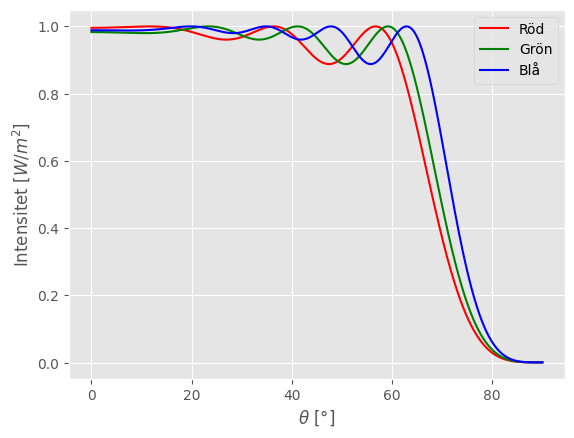

In [59]:
n0 = 1.5
ne0 = 1.6
d = 20e-6
lam_r = 633e-9
lam_g = 549e-9
lam_b = 432e-9
N = 50

theta = np.linspace(0, np.pi/2, 1000)

def ne(theta, ne0, n0):
    return ne0 * n0 / np.sqrt(n0**2 * np.cos(theta)**2 + ne0**2 * np.sin(theta)**2)

def I_ut(theta, lam):
    E_in = np.array([1,0])
    for n in range(N):
        alpha_n = np.pi * n / (2 * N)
        E_in = J_ret2(alpha_n, d/N, ne(theta, ne0, n0), n0, lam) @ E_in
    
    E_ut = J_pol(alpha_n) @ E_in
    return np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

I_ut_lam_r = []
for i in theta:
    I_ut_lam_r.append(I_ut(i, lam_r))

plt.plot(theta*180/np.pi, I_ut_lam_r, label="Röd", color="r")

I_ut_lam_g = []
for i in theta:
    I_ut_lam_g.append(I_ut(i, lam_g))

plt.plot(theta*180/np.pi, I_ut_lam_g, label="Grön", color="g")

I_ut_lam_b = []
for i in theta:
    I_ut_lam_b.append(I_ut(i, lam_b))

plt.plot(theta*180/np.pi, I_ut_lam_b, label="Blå", color="b")

plt.legend()
plt.xlabel(r'$\theta$ [°]')
plt.ylabel("Intensitet [$W/m^2$]")

#### **(c)** Hur ser alltså en ”död” pixel ut, d.v.s. en pixel som det, p.g.a. tillverkningsfel, inte går att lägga spänning över?

När vi inter lägger på någon spänning har vi $\theta = 0$, enligt HUPP2-pdf:en. Som vi ser i plotten är intensiteten för både röd, grön och blå lika med 1 när $\theta = 0$, så när dessa summeras fås vit färg. En död pixel är alltså vit. 

#### **(d)** Hur tunt kan vätskekristallskiktet göras? Med andra ord, hur liten kan $𝑑$ vara under förutsättning att vi fortfarande vill kunna modulera utintensiteten mellan $0$ och $100$% genom att ändra tiltvinkeln mellan $0$ och $90°$. Att ha ett litet värde på $𝑑$ är viktigt eftersom detta ökar snabbheten i ändringen av tiltvinkel så att displayen kan visa snabba bildsekvenser.

Minvärden då theta = 90:
Maxvärden då theta = 0:


Text(0, 0.5, 'Intensitet [$W/m^2$]')

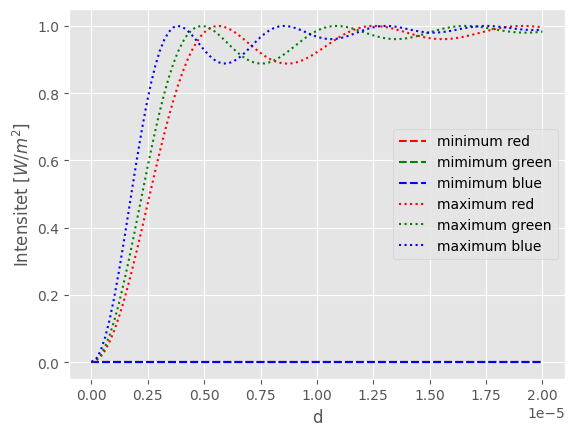

In [79]:
def I_ut_d(theta, lam,d_arg):
    E_in = np.array([1,0])
    for n in range(N):
        alpha_n = np.pi * n / (2 * N)
        E_in = J_ret2(alpha_n, d_arg/N, ne(theta, ne0, n0), n0, lam) @ E_in
    E_ut = J_pol(alpha_n) @ E_in
    return np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2

d_values = np.linspace(0,20e-6,100)

#theta = 0
print("Minvärden då theta = 90:")
#theta = 90
max_r = [I_ut_d(np.pi/2, lam_r,d_val) for d_val in d_values]
max_g = [I_ut_d(np.pi/2, lam_g,d_val) for d_val in d_values]
max_b = [I_ut_d(np.pi/2, lam_b,d_val) for d_val in d_values]

plt.plot(d_values, max_r, label = "minimum red", color = "r", linestyle = "dashed")
plt.plot(d_values, max_g, label = "mimimum green", color = "g", linestyle = "dashed")
plt.plot(d_values, max_b, label = "mimimum blue", color = "b", linestyle = "dashed")
plt.legend()
plt.xlabel("d")
plt.ylabel("Intensitet [$W/m^2$]")

print("Maxvärden då theta = 0:")
#theta = 0
max_r = [I_ut_d(0, lam_r,d_val) for d_val in d_values]
max_g = [I_ut_d(0, lam_g,d_val) for d_val in d_values]
max_b = [I_ut_d(0, lam_b,d_val) for d_val in d_values]

plt.plot(d_values, max_r, label = "maximum red", color="r", linestyle = "dotted")
plt.plot(d_values, max_g, label = "maximum green", color="g", linestyle = "dotted")
plt.plot(d_values, max_b, label = "maximum blue", color="b", linestyle = "dotted")

plt.legend()
plt.xlabel("d")
plt.ylabel("Intensitet [$W/m^2$]")

Det vi gjorde var att anta att största intensiteten uppnås vid $\theta = 0$ och att lägsta intensiteten uppnås vid $\theta = 90$ (grader). Därefter använde vi loops för att beräkna och sedan plotta intensiteten som en funktion av avståndet d, från 0 till 20e-6. På den skalan vi har, (som förvisso inte är så jättenoggran men ändå), så är minimumvärdet alltid väldigt nära noll oavsett d på intervallet. Det som ändras beroende på d är maxvärdet. Okulär inspektion ger att intensiteten för de tre färgerna avvikter nog mycket från 100% vid cirka d = 4e-6. Var man drar gränsen känns lite godtyckligt men vi har typ ett svar. 

svar: 4e-6